# 📌 Project Title: YouTube Trending Videos Analysis

## 📝 Introduction
Brief overview of the project's goal, e.g., understanding what makes videos trend on YouTube using analysis of view counts, likes, duration, etc.


⚠️ Note: This section uses `kaggle.json` from Google Drive to download the dataset using the Kaggle API.
Make sure to keep your API key private and do not upload it to GitHub.


In [13]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/kaggle_projects'

In [135]:
pwd

'/content'

In [3]:
%cd /content/drive/MyDrive/kaggle_projects

/content/drive/MyDrive/kaggle_projects


In [4]:
pwd

'/content/drive/MyDrive/kaggle_projects'

In [17]:
!kaggle datasets download -d anushabellam/trending-videos-on-youtube

Dataset URL: https://www.kaggle.com/datasets/anushabellam/trending-videos-on-youtube
License(s): CC0-1.0
  0% 0.00/29.0k [00:00<?, ?B/s]
100% 29.0k/29.0k [00:00<00:00, 2.82MB/s]


In [18]:
!unzip \*.zip && rm *.zip

Archive:  trending-videos-on-youtube.zip
replace Trending videos on youtube dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: r
new name: Youtube_Trending_videos_data.csv
  inflating: Youtube_Trending_videos_data.csv  




## 📊 Data Description

This project uses a dataset sourced from **Kaggle**, titled **"Trending videos on YouTube"**. It provides detailed information about YouTube videos that have trended across different categories and languages in India.

### 📁 Dataset Context:
Trending helps viewers discover what’s popular on YouTube and in the world. It showcases videos that are of high interest, including predictable trends (like new music videos or movie trailers) and unexpected viral content. Unlike recommendations, Trending is not personalized and shows the same list to all users in a country. In India, Trending results are available in the top 9 Indic languages.

---

### 🧾 Column Descriptions:

| Column Name              | Description |
|--------------------------|-------------|
| `Position`               | Index position of the channel in the trending list |
| `Channel Id`             | Unique ID of the YouTube channel |
| `Channel Title`          | Name/title of the YouTube channel |
| `Video Id`               | Unique identifier of the video |
| `Published At`           | Date the video was published |
| `Video Title`            | Title of the video |
| `Video Description`      | Description or summary of the video content |
| `Video Category Id`      | Numerical category ID of the video |
| `Video Category Label`   | Text label of the video category |
| `Duration`               | Duration of the video (formatted as string, e.g., PT5M4S) |
| `Duration Sec`           | Duration of the video in seconds (numeric format) |
| `Dimension`              | Video dimension (e.g., 2D, HD) |
| `Definition`             | Video quality definition (e.g., HD, SD) |
| `Caption`                | Boolean indicating whether captions are available |
| `Licensed Content`       | Float value indicating licensed content |
| `View Count`             | Total number of views |
| `Like Count`             | Total number of likes |
| `Dislike Count`          | Total number of dislikes |
| `Favorite Count`         | Number of times marked as favorite |
| `Comment Count`          | Total number of comments |



In [49]:
#Data Loading
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/kaggle_projects/Youtube_Trending_videos_data.csv')

In [50]:
df.head()

,Unnamed: 0,channelId,channelTitle,videoId,publishedAt,videoTitle,videoDescription,videoCategoryId,videoCategoryLabel,duration,durationSec,definition,caption,viewCount,likeCount,dislikeCount,commentCount
0,0,UCU1_l0ZJyTK_7HZZ3Ruw8Dg,MAPS,pTnk3ziVVRM,2014-01-10T01:24:57.000Z,Psychedelic Horizons Beyond Psychotherapy Work...,Watch the full workshop at http://psychedelics...,29,Nonprofits & Activism,PT1H19M40S,4780,hd,False,1512,8.0,0.0,1.0
1,1,UCLuO2lUqHrPIIpx0hFenV2g,Tink Tink Club,cuJjSeHZIrg,2015-06-18T16:56:04.000Z,Episode 35 - Dr. James Fadiman,Dr. James Fadiman is the father of modern psyc...,22,People & Blogs,PT1H12M34S,4354,sd,False,881,14.0,0.0,3.0
2,2,UCihqrkaOgVMfLNo2W1hSliA,Podcast Bunk,IuyuZfWtGgg,2016-05-01T05:33:13.000Z,#325 Microdosing from The Adam and Dr Drew Sho...,Adam and Dr. Drew are solo today and they open...,22,People & Blogs,PT50M40S,3040,sd,False,67,0.0,1.0,3.0
3,3,UCgbWWPn3VYYzxjffZbfj9GQ,Alan Springwind,cng_ZhQf8iY,2016-01-25T04:48:22.000Z,Microdosing Away The Same Old Blues,Source: https://www.spreaker.com/user/springwi...,24,Entertainment,PT32M21S,1941,hd,False,4,0.0,0.0,0.0
4,4,UCFmLi6X1mojkFZOFngNR9tQ,Drug Education Agency,OpQIQEx7J5A,2014-08-15T10:53:58.000Z,Erschossener Kiffer / Drogen in Mikro-Dosierun...,"Von erschossenen ""Dealern"", von demonstrierend...",24,Entertainment,PT26M32S,1592,hd,False,5465,121.0,6.0,25.0


In [51]:
df.dtypes

,0
Unnamed: 0,int64
channelId,object
channelTitle,object
videoId,object
publishedAt,object
videoTitle,object
videoDescription,object
videoCategoryId,int64
videoCategoryLabel,object
duration,object


DATA CLEANING:
1. we have to remove Unnamed: 0 column
2. we have to remove videoCategoryId column
3. we don't need duration column, so we have to remove them
4. we have to split date and time for our convenience(publishedAt)
5. we have to change the datatype of likeCount,dislikeCount,commentCount to integer

In [52]:
df.drop(['Unnamed: 0','videoCategoryId','duration'],axis=1,inplace=True)

In [53]:
df['publishedAt']=pd.to_datetime(df['publishedAt'])

In [54]:
df['published_date']=pd.to_datetime(df['publishedAt'].dt.date)

In [60]:
df['published_hour']=df['publishedAt'].dt.hour

In [62]:
df['publishedAt']=df['publishedAt'].dt.time

In [64]:
 df['likeCount']=df['likeCount'].astype('Int64')
 df['dislikeCount']=df['dislikeCount'].astype('Int64')
df['commentCount']=df['commentCount'].astype('Int64')

In [65]:
df.dtypes

,0
channelId,object
channelTitle,object
videoId,object
publishedAt,object
videoTitle,object
videoDescription,object
videoCategoryLabel,object
durationSec,int64
definition,object
caption,bool


DATA CLEANING IS DONE!!

Now we have to go with EDA(Exploratory Data Analysis)

Problem statements:
1. What factors influence a video to trend on YouTube?

Hypothesis:

1. Videos published in the morning (9 AM to 12 PM) get more views on average.

H₀: Upload time has no effect on view count

H₁: Upload time influences view count

2. Videos with more likes and comments tend to have more views.

H₀: high likes and comments won't results in more views

H₁: high likes and comments results in more views

3. Video length plays a key role in Trending videos

H₀: Video length won't play a key role in Trending videos

H₁: Video length plays a key role in Trending videos



Now we ave to go with our first Hypothesis

Videos published in the morning (9 AM to 12 PM) get more views on average

So we have to sort the data by viewCount in decending order

We will focus on the top 15 most viewed videos

In [90]:
df.sort_values(by='viewCount',ascending=False).head(15)

,channelId,channelTitle,videoId,publishedAt,videoTitle,videoDescription,videoCategoryLabel,durationSec,definition,caption,viewCount,likeCount,dislikeCount,commentCount,published_date,published_hour
9,UCn8V3KNSgDr1Dai77_y8JrQ,PsychedSubstance,UGxSZqTZVaU,13:44:39,Microdosing LSD or any Psychedelic,How to microdose psychedelics! Everything you ...,Science & Technology,805,hd,False,526243,7046,255,1706,2015-09-12,13
29,UCn8V3KNSgDr1Dai77_y8JrQ,PsychedSubstance,54pkxpLiIJc,15:00:00,Mescaline Microdose,What's it like to microdose mescaline? Watch t...,Entertainment,465,hd,False,148681,3698,49,1212,2016-01-30,15
7,UCmrLCXSDScliR7q8AxxjvXg,Black Pigeon Speaks,4ekkXrfmPM8,09:27:30,LSD: Microdosing & the SUPERNATURAL,a http://vidmax.com/ original. If you would li...,News & Politics,820,hd,False,108974,4329,990,3672,2016-04-23,9
30,UC6kFuQCLBFJnIzzhC5cysaA,The Natural Way of Healing,Zy_L2BiCd5Q,12:59:32,MICRODOSING MUSHROOMS : The Benefits of Microd...,Microdosing Psilocybin Mushrooms can be a very...,Entertainment,458,hd,False,59255,870,35,523,2015-10-10,12
33,UCXSF1F_RFRUVNXX4QmB6vmw,Your Mate Tom,iG6nxxfx42w,09:20:00,Microdosing PSILOCYBIN Mushrooms Experiment | ...,Support me on Patreon: https://www.patreon.com...,Education,444,hd,False,35928,323,12,178,2015-11-10,9
23,UCldfgbzNILYZA4dmDt4Cd6A,Secular Talk,8B8bO0WMVTw,02:48:42,'Microdosing' Psychedelic Drugs Has Positive E...,At the fifth annual Horizons: Perspectives on ...,News & Politics,504,hd,False,28167,868,26,338,2015-06-18,2
37,UCvb-DqrtgHRX-hPypnjfkdw,The Point with Ana Kasparian,2PUL2hNeKlg,22:15:50,"What You Need To Know About ""Microdosing""",A new way of taking drugs is being explored am...,News & Politics,369,hd,False,27571,358,134,349,2015-06-26,22
27,UC-MsM6mCPLnUrjOAfsCMTxw,Young Morpheus,syccbpQvmmU,16:46:15,DMT Breakthrough / Micro dosing Method,In this video: 1. What a full breakthrough is ...,People & Blogs,491,hd,False,18908,200,7,80,2015-02-14,16
5,UCxSbJSgLqIO8r7TONBN5dvw,Oracle Frequency Podcast,U6Ecm1Kb4AI,06:52:13,Microdosing Psilocybin Mushrooms & LSD - The O...,"In recent years, more and more psychedelic exp...",Entertainment,1507,hd,False,12092,136,2,41,2015-10-11,6
10,UCXSF1F_RFRUVNXX4QmB6vmw,Your Mate Tom,cnFTo2zFUgw,16:26:46,Microdosing PSILOCYBIN Mushrooms Experiment ||...,I DO NOT CONDONE THE USE OF ANY DRUGS --------...,Education,752,hd,False,8869,298,1,80,2015-12-05,16


<Axes: xlabel='published_hour'>

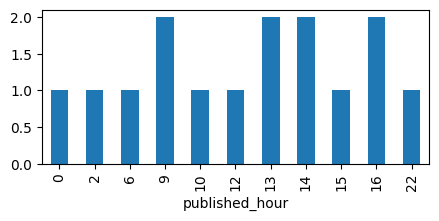

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,2))  #adjust the figure size to make it clear and simple
df.sort_values(by='viewCount',ascending=False)['published_hour'].head(15).value_counts().sort_index().plot(kind='bar')

As we observe videos which punlished between 9 to 12 and 1 to 4 have more views

In top 15 videos with more views 11 of them are between this time intervals based on my analysis

So we can say that upload time influences view count on my analysis

Now we move towards our 2nd hypothesis

Videos with high likes and commnets are only result of more views

For that we have to get top 10 videos with more views

In [104]:
top_videos=df.sort_values(by='viewCount',ascending=False).head(10)
#We created a dataframe of top 10 videos called 'top_videos' in the cleaned dataset for futher process

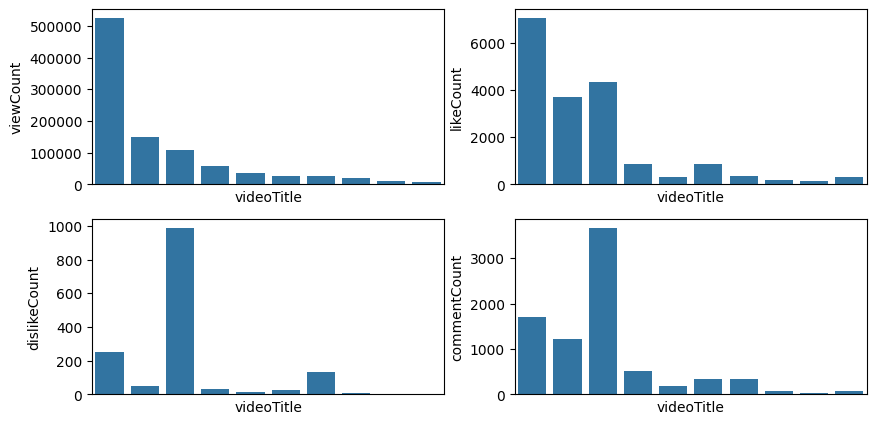

In [102]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.barplot(x=top_videos['videoTitle'],y=top_videos['viewCount'])
plt.xticks([])  #To make graph clear we removed x values on axis
plt.subplot(2,2,2)
sns.barplot(x=top_videos['videoTitle'],y=top_videos['likeCount'])
plt.xticks([])
plt.subplot(2,2,3)
sns.barplot(x=top_videos['videoTitle'],y=top_videos['dislikeCount'])
plt.xticks([])
plt.subplot(2,2,4)
sns.barplot(x=top_videos['videoTitle'],y=top_videos['commentCount'])
plt.xticks([])
plt.show()
#To compare likes,dislikes,comments with views we created plot which contains 4 subplots


If we observe, likes and comments counts are directly proportional to views

As likes and commnets are more, views will be more

But if you closely observe 3rd video has more likes and commnets complared to 2nd video but it is the 3rd most viewed video

The reason for this is dislikes, if you observe 2nd video have less dislikes(49) but 3rd video has more dislikes(990)

so we can say that

dislikes is inversly proportial to views

as dislikes are more views will be less

So we can say that high likes and comments won't results in more views

In [131]:
top_videos_1=df.sort_values(by='viewCount',ascending=False).head(20)

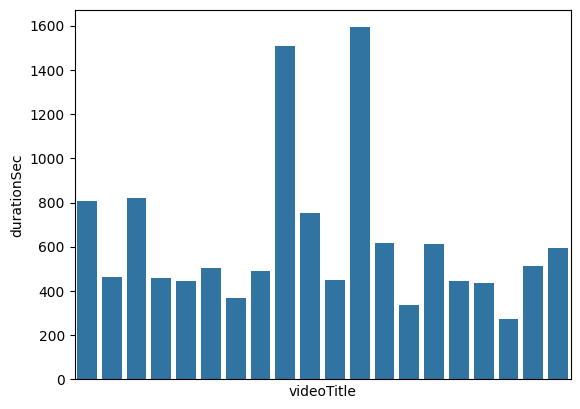

In [133]:
sns.barplot(x=top_videos_1['videoTitle'],y=top_videos_1['durationSec'])
plt.xticks([])  #To make the graph clear we removed x values on axis
plt.show()

We obseve that videos with length between 6 to 14 min will get more views on an average

Video length plays a key role in Trending videos

<Axes: xlabel='videoCategoryLabel'>

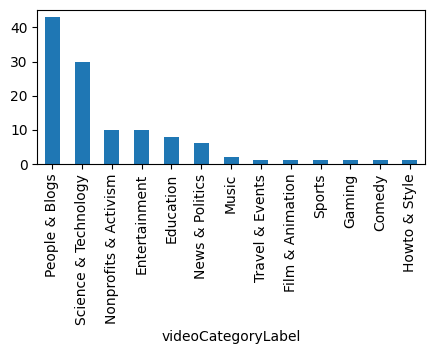

In [110]:
plt.figure(figsize=(5,2))
df['videoCategoryLabel'].value_counts().plot(kind='bar')
#top trending category observation

The top trending category is **People & Blogs**

## ✅ Conclusion

In this project, I analyzed the "Trending Videos on YouTube" dataset to understand what factors influence a video to trend. Based on two hypotheses, here’s what I found:

### 🔹 Hypothesis 1:
**Videos published between 9 AM to 12 PM and 1 AM to 4 PM get more views.**

✔️ The analysis showed a noticeable increase in average views for videos published in the morning. This suggests that **publishing time may play a role** in a video's performance.

### 🔹 Hypothesis 2:
**Videos with more likes and comments have more views.**

✔️ There is a strong positive correlation between views, likes, and comments. Interestingly, dislikes also showed a correlation, increase in the dislikes results in less views

### 🔹 Hypothesis 3:
**Video length plays a key role in Trending videos**

✔️ Video length plays a crucial role in high engagement, audience like to see videos of optimal length(6 to 14 min) based on my analysis on top 20 videos
    
---

### 📊 Final Insight:
- Publishing videos at the right time,optimal video length and encouraging audience interaction (likes & comments) **can significantly impact a video’s chance of trending**.
